In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Real_Combine.csv")

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

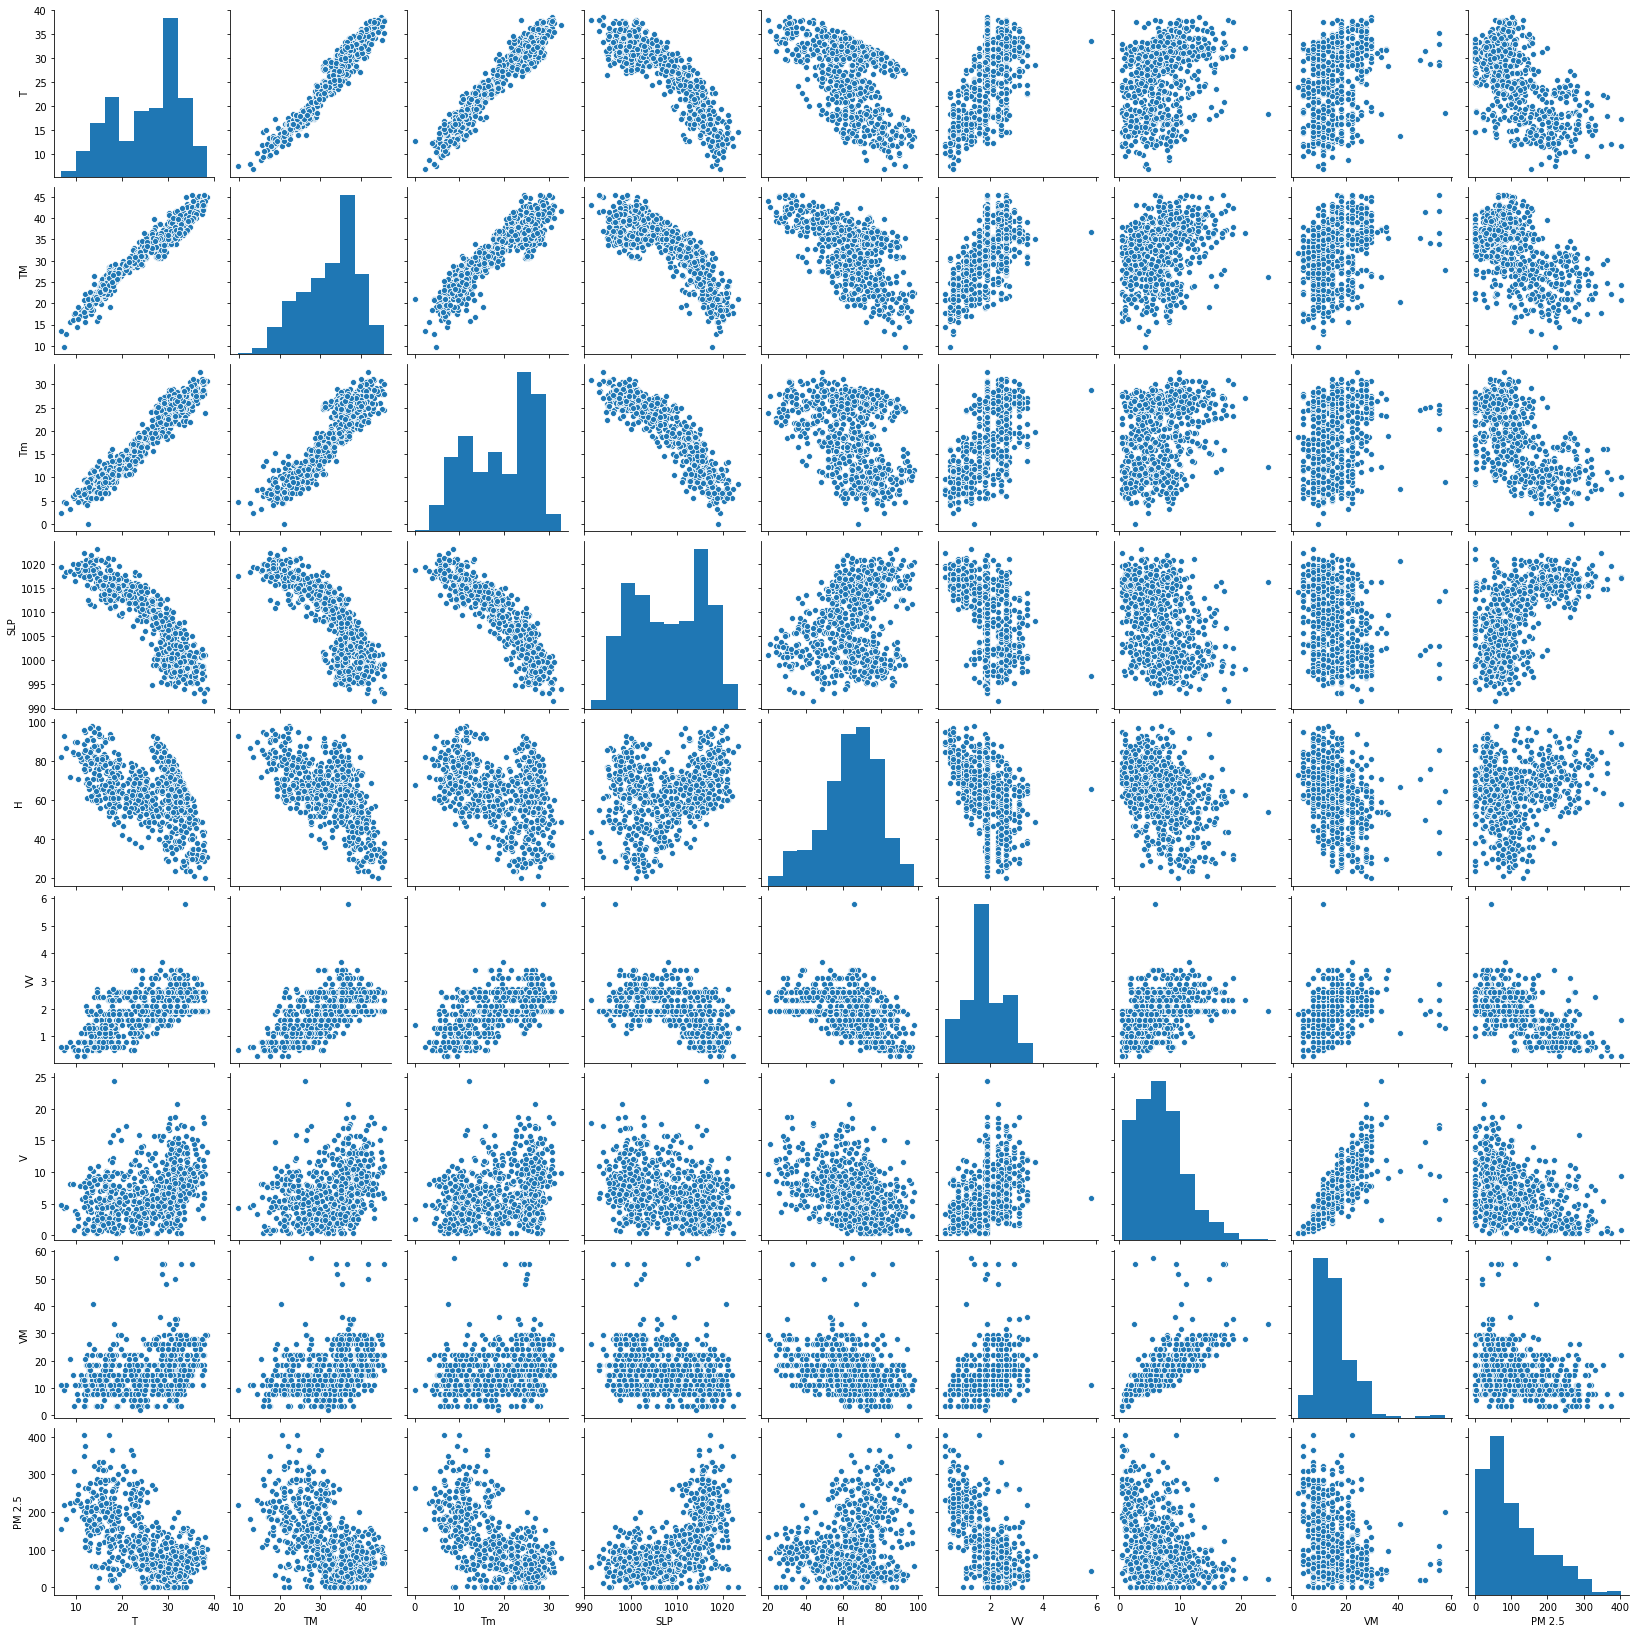

In [8]:
sns.pairplot(df)

In [9]:
#Pearson correlation

df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


# Finding the feature importance

#Feature importance provides a score to the features and higher the score better is the predictor in predicting the target variable.



In [10]:
X = df.iloc[:,:-1]#independent features
y = df.iloc[:,-1]#dependent features

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[0.15753269 0.07456349 0.18034966 0.14264294 0.08341506 0.26838658
 0.05310237 0.04000721]


In [13]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


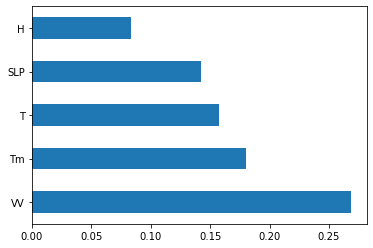

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Linear Regression

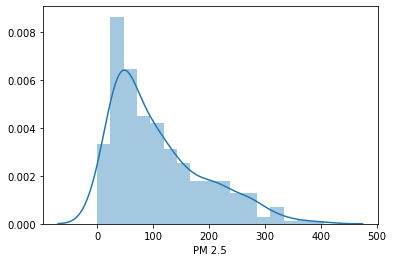

In [15]:
sns.distplot(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
regressor.coef_

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [20]:
X_train.head(3)

,T,TM,Tm,SLP,H,VV,V,VM
236,25.7,32.8,17.5,1010.3,41.0,2.6,12.8,25.9
525,21.9,29.0,17.1,1016.0,75.0,1.1,1.9,5.4
12,12.3,21.4,6.4,1019.6,70.0,1.9,6.7,14.8


In [21]:
regressor.intercept_

-157.37425475061315

In [23]:
print("Coefficient of determination R^2 on train set: {}".format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 on train set: 0.6007706404750855


In [25]:
y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([ 189.33203792,  242.24961682,  244.4703608 ,   92.25565539,
        127.85314121,   47.02861996,   18.34426231,  204.20476087,
         57.00374483,  114.48318633,  154.31677169,  159.24589032,
        122.23767954,  202.37875249,  193.14582279,  199.31056617,
         77.70532217,   23.59159547,  140.35618721,   51.96119051,
         52.79032253,  171.73215813,   10.02662778,  195.39590735,
        209.65256071,   74.99359732,  108.00250348,  104.43088255,
         36.82517046,  107.70799932,  162.34530641,   97.66978551,
         22.95042947,  144.49906438,  185.04431819,  120.9811852 ,
        147.70774514,  188.20412429,   68.89958492,  161.89925135,
         73.04961493,  223.09338261,   15.64591126,   73.87857951,
        138.14114584,   39.49747947,  238.05967758,   91.3082908 ,
         96.61833849,   35.85279287,  104.00194382,  167.8782917 ,
         33.77103417,  206.3441888 ,  171.79678132,   86.49544245,
        144.56984663,   21.58010751,   61.03874235,  182.79433

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 40.28335537132943
MSE: 3057.6641286741387
RMSE: 55.296149311449696


In [32]:
y_test

197    205.125000
188    264.916667
14     319.737500
31       1.916667
391    137.125000
          ...    
155     99.708333
392    197.083333
572    132.208333
307     38.416667
201    246.041667
Name: PM 2.5, Length: 219, dtype: float64

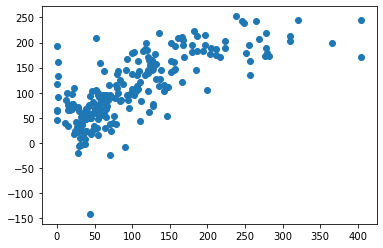

In [33]:
plt.scatter(y_test,y_pred)

Clearly the data does not suit a linear regression problem

# Cross validation

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [35]:
score.mean()

0.46724362258523333

In [36]:
score.min()

0.1151108619019322

In [37]:
score.max()

0.6414879729983562

In [38]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,2.639490
TM,0.519979
Tm,-7.598118
SLP,0.493220
H,-0.837064
VV,-50.430135
V,-2.754178
VM,-0.039266


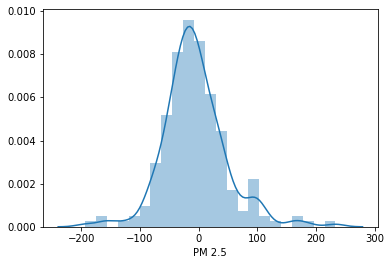

In [39]:
sns.distplot(y_test-y_pred)

In [40]:
import pickle

In [41]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)